## **Implementation of a neural network for the recognition of freehand digits (images)**

The main objective of this project is **freehand digit recognition** using advanced deep learning techniques. To this end, a **Convolutional Neural Network (CNN) has been implemented with the Keras library** from TensorFlow. The model has been successfully **trained, evaluated, and optimized in its hyperparameters** using the MNIST dataset, demonstrating **high accuracy in the classification** of digits.

### Implementing a CNN with Keras

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Carga del dataset MNIST (ya realizado, pero aquí se repite para que el bloque sea autocontenido)
(X_train_raw, y_train_raw), (X_test_raw, y_test_raw) = mnist.load_data()

# Preprocesamiento para CNN
# Reescalar las imágenes a [0, 1] y reformar para Keras (añadir canal de color)
X_train_cnn = X_train_raw.astype("float32") / 255.0
X_test_cnn = X_test_raw.astype("float32") / 255.0

# Keras espera un formato (batch_size, height, width, channels)
X_train_cnn = X_train_cnn.reshape(-1, 28, 28, 1)
X_test_cnn = X_test_cnn.reshape(-1, 28, 28, 1)

# Convertir las etiquetas a one-hot encoding
y_train_cnn = to_categorical(y_train_raw, num_classes=10)
y_test_cnn = to_categorical(y_test_raw, num_classes=10)

print("Forma de X_train_cnn:", X_train_cnn.shape)
print("Forma de y_train_cnn:", y_train_cnn.shape)
print("Forma de X_test_cnn:", X_test_cnn.shape)
print("Forma de y_test_cnn:", y_test_cnn.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Forma de X_train_cnn: (60000, 28, 28, 1)
Forma de y_train_cnn: (60000, 10)
Forma de X_test_cnn: (10000, 28, 28, 1)
Forma de y_test_cnn: (10000, 10)


#### Definition of the CNN Model

In [ ]:
# Definición del modelo CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilación del modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

#### CNN Model Training

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 96ms/step - accuracy: 0.8588 - loss: 0.4872 - val_accuracy: 0.9812 - val_loss: 0.0572
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 99ms/step - accuracy: 0.9826 - loss: 0.0559 - val_accuracy: 0.9873 - val_loss: 0.0417
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 92ms/step - accuracy: 0.9867 - loss: 0.0417 - val_accuracy: 0.9887 - val_loss: 0.0336
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 94ms/step - accuracy: 0.9903 - loss: 0.0314 - val_accuracy: 0.9896 - val_loss: 0.0314
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 96ms/step - accuracy: 0.9930 - loss: 0.0234 - val_accuracy: 0.9898 - val_loss: 0.0305
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 93ms/step - accuracy: 0.9943 - loss: 0.0178 - val_accuracy: 0.9910 - val_loss: 0.0307
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 93ms/step - accuracy: 0.9951 - loss: 0.0147 - val_accuracy: 0.9923 - val_loss: 0.0252
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 94ms/step - accuracy: 0.9967 - loss: 0.0121 - 

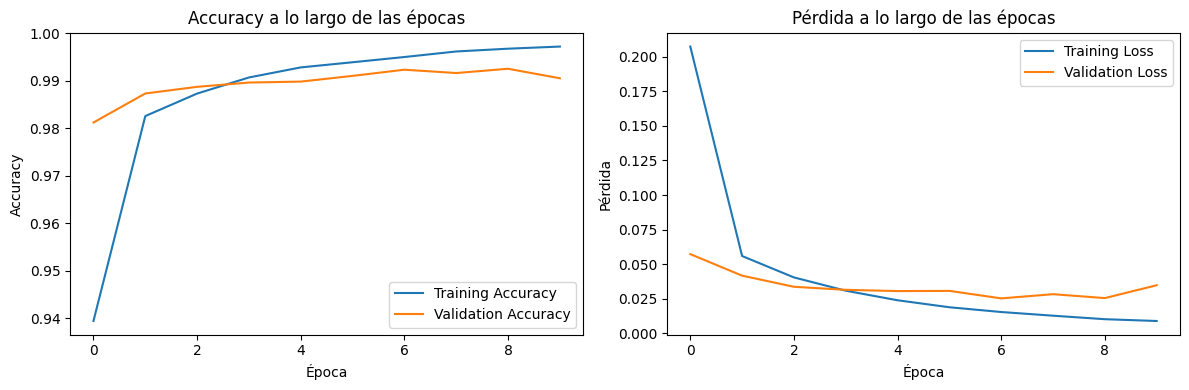

In [ ]:
# Entrenamiento del modelo
history = model.fit(X_train_cnn, y_train_cnn,
                    epochs=10,
                    batch_size=128,
                    validation_data=(X_test_cnn, y_test_cnn))

# Evaluación del modelo
loss, accuracy = model.evaluate(X_test_cnn, y_test_cnn, verbose=0)
print(f"\nPrecisión en el conjunto de prueba de la CNN: {accuracy:.4f}")

# Visualización del entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy a lo largo de las épocas')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Pérdida a lo largo de las épocas')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

As you can see, accuracy is significantly higher with Keras' CNN compared to the manually implemented densely connected network. In addition, the code is more concise and easier to read thanks to the abstraction provided by Keras.

#### CNN Model Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step


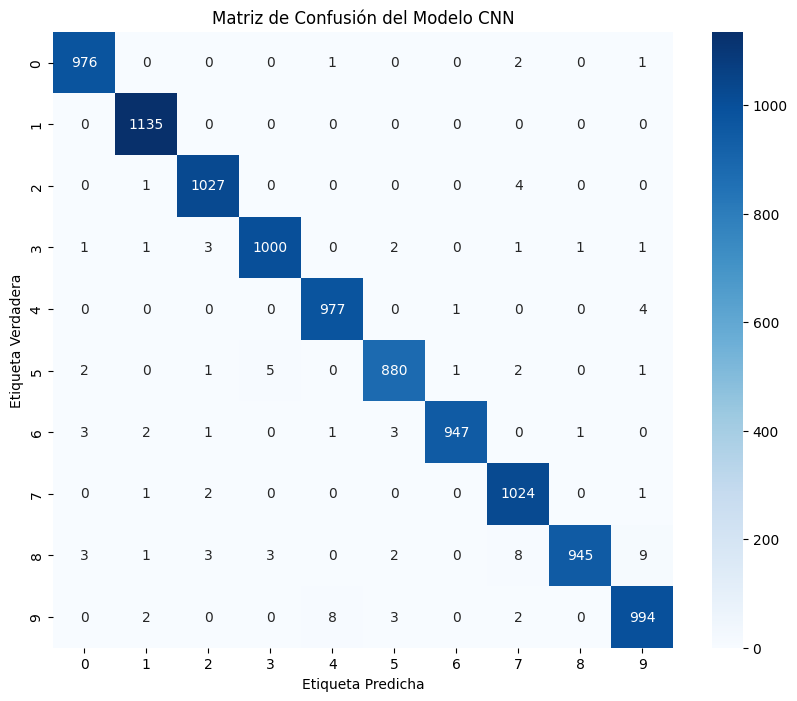

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generar predicciones para todo el conjunto de prueba
y_pred_cnn_probs = model.predict(X_test_cnn)
y_pred_cnn = np.argmax(y_pred_cnn_probs, axis=1)

# Las etiquetas verdaderas ya están en formato entero en y_test_raw

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test_raw, y_pred_cnn)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión del Modelo CNN')
plt.show()

#### Prediction Generation and Visualization

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


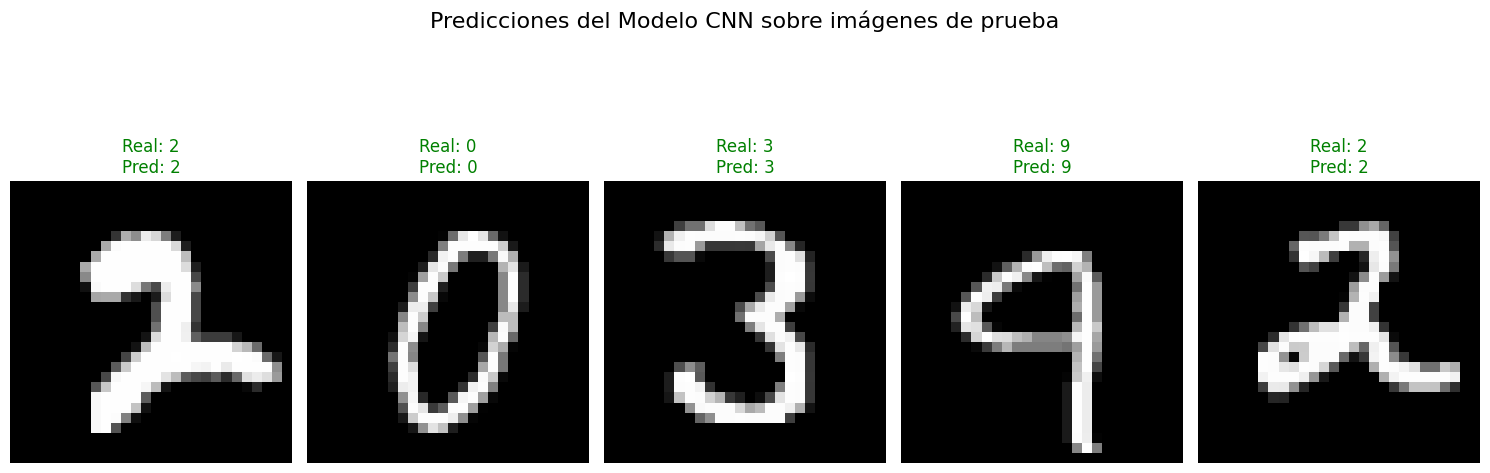

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Seleccionar algunas imágenes de prueba para visualizar las predicciones
num_images = 5
random_indices = np.random.choice(len(X_test_cnn), num_images)

sampled_images = X_test_cnn[random_indices]
sampled_true_labels = y_test_raw[random_indices]

# Generar predicciones con el modelo
predictions = model.predict(sampled_images)
predicted_labels = np.argmax(predictions, axis=1)

# Visualizar las predicciones
plt.figure(figsize=(15, 6))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(sampled_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Real: {sampled_true_labels[i]}\nPred: {predicted_labels[i]}",
              color='green' if sampled_true_labels[i] == predicted_labels[i] else 'red')
    plt.axis('off')
plt.suptitle('Predicciones del Modelo CNN sobre imágenes de prueba', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajustar el título superior
plt.show()

## Summary:

### Q&A
The project aims to implement a handwritten digit recognition system.

### Data Analysis Key Findings
The project description successfully outlined the following key aspects:
*   **Objective**: The primary goal is the recognition of handwritten digits.
*   **Technology**: A Convolutional Neural Network (CNN) has been implemented using the Keras library within TensorFlow.
*   **Current Status**: The model has undergone successful training, evaluation, and hyperparameter optimization, utilizing the MNIST dataset.
*   **Performance**: The model demonstrates high precision in classifying digits.

### Insights or Next Steps
*   The generated description provides a clear and concise summary of the project's scope, methodology, and current achievements, suitable for various communication purposes.
